<a href="https://colab.research.google.com/github/Luensmann/Bachelorarbeit/blob/main/Evaluation/Eval_SETH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from transformers import AutoTokenizer, BertForTokenClassification, AutoModelForTokenClassification
from datasets import load_dataset

In [ ]:
# labels

labels = ['O', 'B-Gene', 'I-Gene', 'B-SNP', 'I-SNP', 'B-RS', 'I-RS']

id2label = {
    0: "O",
    1: "B-Gene",
    2: "I-Gene",
    3: "B-SNP",
    4: "I-SNP",
    5: "B-RS",
    6: "I-RS",
}
label2id = {
    "O": 0,
    "B-Gene": 1,
    "I-Gene": 2,
    "B-SNP": 3,
    "I-SNP": 4,
    "B-RS": 5,
    "I-RS": 6,
}

In [ ]:
dataset = load_dataset("Brizape/SETH_tokenized_split_0404_dev")
dataset

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating validation split:   0%|          | 0/101 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/126 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/403 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to C:/Users/pc/.cache/huggingface/datasets/Brizape___parquet/Brizape--SETH_tokenized_split_0404_dev-f498170a431e904f/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    validation: Dataset({
        features: ['id', 'tokens', 'ner_tags', 'texts', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 101
    })
    test: Dataset({
        features: ['id', 'tokens', 'ner_tags', 'texts', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 126
    })
    train: Dataset({
        features: ['id', 'tokens', 'ner_tags', 'texts', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 403
    })
})

In [ ]:
# get all texts for predictions
texts = []
for item in dataset["test"]:
    texts.append(item["texts"])
print(len(texts))

# get all gold labels aka true labels
gold_id_all = []
for item in dataset["test"]:
    gold_id_all.append(item["labels"][1:-1])
print(len(gold_id_all))

# convert all IDs into labels
gold_label_all = []
for item in gold_id_all:
    gold_label_all.append([id2label[i] for i in item])
print(len(gold_label_all))

126
126
126


In [ ]:
saveName = "2e-05_0404_ES6_strict_tok"
model = "Brizape/SETH_" + saveName
tokenizer = AutoTokenizer.from_pretrained(model)
model = AutoModelForTokenClassification.from_pretrained(model)

In [ ]:
# gold_id_all - expected outputs in ids-format
# gold_label_all - expected outputs in label-format
# pred_label_all - all predicted labels in label-format
# pred_id_all - all predicted labels in id-format

# del all missmatches in both list:
# gold_id - expected outputs in ids-format
# gold_label - expected outputs in label-format
# pred_label - all predicted labels in label-format
# pred_id - all predicted labels in id-format

# gold_label_norm - normalisation; removed prefix
# pred_label_norm - normalisation; removed prefix

# y_true - for sklearn, no sublists
# y-pred - for sklearn, no sublists

In [ ]:
def predict(text):
    
    inputs = tokenizer(text, add_special_tokens=False, truncation=True, max_length=512, return_tensors="pt")
    if inputs['input_ids'].numel() == 0:
        print("input_ids is empty")
        return []
    
    with torch.no_grad():
        logits = model(**inputs).logits 
    predictions = torch.argmax(logits, dim=2)
    
    predicted_token_class = [model.config.id2label[t.item()] for t in predictions[0]]

    return predicted_token_class

In [ ]:
# predict all text
pred_label_all = []
for index, text in enumerate(texts):
    print(index, end=' ')
    pred_label_all.append(predict(text))
len(pred_label_all)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 

126

In [ ]:
# delete all special token
for i, (pred, gold) in enumerate(zip(pred_label_all, gold_label_all)):
    if len(pred) == 512:
        for pred_tag, gold_tag in zip(pred, gold):
            print(pred_tag, gold_tag)
        pred_label_all[i] = pred[1:-1]
        print(pred)

O O
O O
O O
O O
O O
I-Gene O
I-Gene O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
B-Gene B-Gene
I-Gene I-Gene
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
B-Gene B-Gene
I-Gene I-Gene
O I-Gene
B-Gene I-Gene
I-Gene I-Gene
O O
O O
O O
O O
O O
O O
B-Gene O
I-Gene O
O O
I-Gene O
I-Gene O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
B-Gene B-Gene
I-Gene I-Gene
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
O O
B-Gene B-Gene
I-Gene I-Gene
O O
O O
O

In [ ]:
# convert all IDs into labels
pred_id_all = []
for item in pred_label_all:
    pred_id_all.append([label2id[i] for i in item])
len(pred_id_all)

126

In [ ]:
# checking if all gold and pred are same len
# reutrn list with indices of all missmatches
def check_len(gold, pred):
    missmatch_index = []
    for index, (gold, pred) in enumerate(zip(gold, pred)):
        if len(gold)==len(pred):
            #print("yes")
            continue
        else:
            missmatch_index.append(index)
    print("indices to del:" + str(missmatch_index))
    return missmatch_index

In [ ]:
# delete all missmatches from both sets
def del_missmatches(list1, list2, indices_to_del):
    for index in sorted(indices_to_del, reverse=True):
            del list1[index]
            del list2[index]

In [ ]:
# copy _all files
gold_id = gold_id_all[:]
gold_label = gold_label_all[:]
pred_id = pred_id_all[:]
pred_label = pred_label_all[:]
all = [gold_id, gold_label, pred_id, pred_label]
print('len befor:')
for list in all:
    print(len(list))
# get indicies with missmatch
# and delete them from both sets
indices_to_del = check_len(gold_id, pred_id)
del_missmatches(gold_id , pred_id, indices_to_del)
del_missmatches(gold_label , pred_label, indices_to_del)
print('len after:')
for list in all:
    print(len(list))
    


len befor:
126
126
126
126
indices to del:[]
len after:
126
126
126
126


In [ ]:
############################################################
######################### seqeval ##########################
############################################################

In [ ]:
from seqeval.metrics import accuracy_score
from seqeval.metrics import classification_report
from seqeval.metrics import f1_score
from seqeval.scheme import IOB2
from seqeval.metrics import classification_report
from seqeval.scheme import IOB2

In [ ]:
# generate metrics
# metric
print("\n")
print("-"*60 + "\n" + "    SeqEval strict\n" + "-"*60)
print("default: \n" + classification_report(gold_label, pred_label, mode='strict'))

print("\n")
print("-"*60 + "\n" + "    SeqEval default\n" + "-"*60)
print("default: \n" + classification_report(gold_label, pred_label))



------------------------------------------------------------
    SeqEval strict
------------------------------------------------------------
default: 
              precision    recall  f1-score   support

        Gene       0.71      0.61      0.65       375
         SNP       0.85      0.66      0.74       162

   micro avg       0.75      0.62      0.68       537
   macro avg       0.78      0.63      0.70       537
weighted avg       0.75      0.62      0.68       537



------------------------------------------------------------
    SeqEval default
------------------------------------------------------------
default: 
              precision    recall  f1-score   support

        Gene       0.66      0.61      0.64       375
         SNP       0.65      0.67      0.66       162

   micro avg       0.66      0.63      0.64       537
   macro avg       0.66      0.64      0.65       537
weighted avg       0.66      0.63      0.64       537



In [ ]:
# save reports as csv
import pandas as pd
report = pd.DataFrame(classification_report(gold_label, pred_label, mode='strict', digits=2, output_dict=True)).transpose()
print(report)
df = pd.DataFrame(report)#.transpose()
# With a Sheet Name
file_name = "SETH" + saveName
report.to_excel('SETH\ ' + saveName + '.xlsx', index=True)

              precision    recall  f1-score  support
Gene           0.711599  0.605333  0.654179    375.0
SNP            0.849206  0.660494  0.743056    162.0
micro avg      0.750562  0.621974  0.680244    537.0
macro avg      0.780403  0.632914  0.698617    537.0
weighted avg   0.753112  0.621974  0.680991    537.0


In [ ]:
#######################################################
####################### sklearn #######################
#######################################################

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import pandas as pd
import seaborn as sns
import evaluate

In [ ]:
y_pred = []
for sublist in pred_id:
    for label in sublist:
        y_pred.append(label)
len(y_pred)

30325

In [ ]:
y_true = []
for sublist in gold_id:
    for label in sublist:
        y_true.append(label)
len(y_true)

30325

In [ ]:
print(unique_labels(y_pred))
print(unique_labels(y_true))

[0 1 2 3 4]
[0 1 2 3 4]


In [ ]:
confusion_matrix(y_true, y_pred, labels=[0,1,2,3,4,5,6])

array([[28477,    54,    57,    10,    70,     0,     0],
       [  106,   256,    13,     0,     0,     0,     0],
       [  228,     8,   295,     0,     0,     0,     0],
       [   43,     1,     0,   116,     2,     0,     0],
       [   95,     0,     1,     0,   493,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0]], dtype=int64)

In [ ]:
def plot(freal, predicted_token_class, label_list):
    label_names = label_list #unique_labels(y_true)
    columns = [f'{label}' for label in label_names]
    index = [f'{label}' for label in label_names]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred, labels=[0,1,2,3,4,5,6]), columns=columns, index=index)
    return table

In [ ]:
plot = plot(y_true, y_pred, labels)
print(plot)
df = pd.DataFrame(plot)#.transpose()
df.to_excel('SETH\ ' + saveName + 'confusion_.xlsx', index=True)

            O  B-Gene  I-Gene  B-SNP  I-SNP  B-RS  I-RS
O       28477      54      57     10     70     0     0
B-Gene    106     256      13      0      0     0     0
I-Gene    228       8     295      0      0     0     0
B-SNP      43       1       0    116      2     0     0
I-SNP      95       0       1      0    493     0     0
B-RS        0       0       0      0      0     0     0
I-RS        0       0       0      0      0     0     0


In [ ]:
def plot_heat(freal, predicted_token_class, label_list):
    label_names = label_list#unique_labels(y_true)
    columns = [f'{label}' for label in label_names]
    index = [f'{label}' for label in label_names]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred, labels= [0,1,2,3,4,5,6]), columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', linewidth=.1, vmax=500, cmap='YlOrBr')

[Text(0.5, 23.52222222222222, 'Prediction'),
 Text(50.722222222222214, 0.5, 'Actual')]

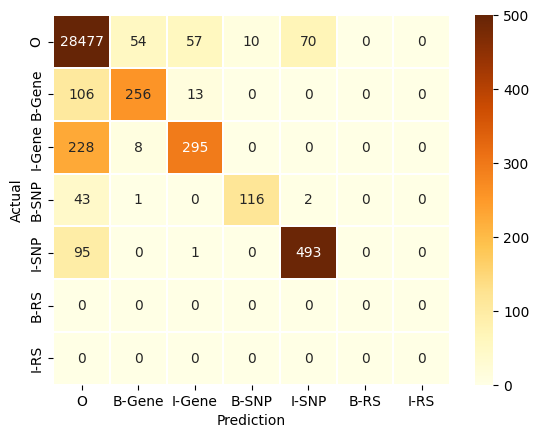

In [ ]:
ax = plot_heat(y_true, y_pred, labels)
ax.set(xlabel="Prediction", ylabel="Actual")

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
exl = pd.DataFrame()


report = classification_report(y_true, y_pred, labels=[i for i in range(7)], target_names = labels, output_dict=True)
print(report)
df = pd.DataFrame(report).transpose()
print("\n")
print("-"*60 + "\n" + "    Label Report\n" + "-"*60)
print(df)
exl = exl.append(df, ignore_index=True)
exl.to_excel('SETH\ ' + saveName + '_labelReport.xlsx', index=True)#.transpose()

{'O': {'precision': 0.983695464437459, 'recall': 0.9933375191851542, 'f1-score': 0.9884929795025774, 'support': 28668}, 'B-Gene': {'precision': 0.8025078369905956, 'recall': 0.6826666666666666, 'f1-score': 0.7377521613832853, 'support': 375}, 'I-Gene': {'precision': 0.8060109289617486, 'recall': 0.5555555555555556, 'f1-score': 0.6577480490523968, 'support': 531}, 'B-SNP': {'precision': 0.9206349206349206, 'recall': 0.7160493827160493, 'f1-score': 0.8055555555555556, 'support': 162}, 'I-SNP': {'precision': 0.8725663716814159, 'recall': 0.8370118845500849, 'f1-score': 0.854419410745234, 'support': 589}, 'B-RS': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, 'I-RS': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0}, 'micro avg': {'precision': 0.9773124484748558, 'recall': 0.9773124484748558, 'f1-score': 0.9773124484748558, 'support': 30325}, 'macro avg': {'precision': 0.6264879318151628, 'recall': 0.5406601440962158, 'f1-score': 0.5777097366055784, 'suppo

C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_st

In [ ]:
i = 0
for (pred, gold, inIDs) in zip(pred_label, gold_label, dataset['test']['input_ids']):
    print(i, len(pred), len(inIDs[1:-1]), end="\n")
    i = i+1
    for i, (label1, label2, inID) in enumerate(zip(pred, gold, inIDs[1:-1])):
        print(i, tokenizer.decode(inID), ":(" + str(label1), ",", label2 + ')')
        if label1 != label2:
            print("#########################")
            #print(":(" + str(label1), ",", label2, end=')\n')
    print(" ")